✅ Correlation of selected features with DEP_DELAY:

    Feature  Correlation_with_DEP_DELAY
1  DISTANCE                    0.125907
0  TAXI_OUT                   -0.044882


C:\Users\PC\AppData\Local\Temp\ipykernel_44372\438640162.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


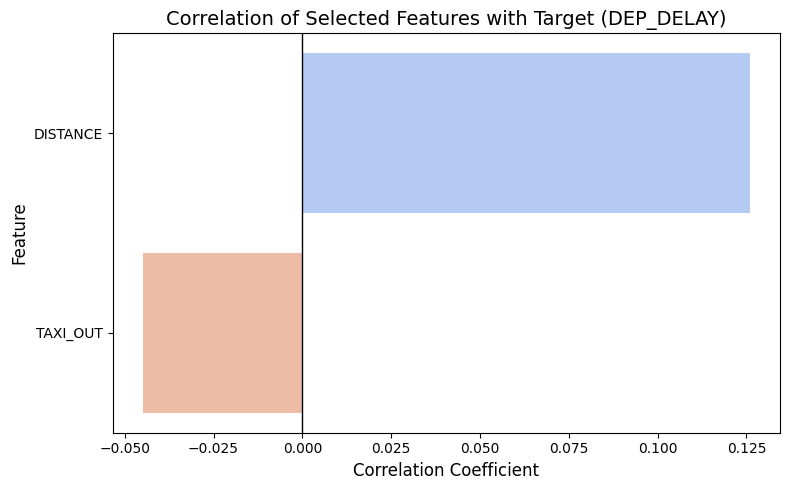

In [1]:
# ==============================================
# Custom correlation: DEP_DELAY vs manually selected features
# ==============================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---- 1. Load dataset ----
df = pd.read_csv(r'D:\Project DS Final\xx.csv')

# ---- 2. Nhập tên các biến bạn muốn kiểm tra ----
# 👉 Ví dụ: bạn có thể sửa danh sách này tuỳ ý
selected_features = ["TAXI_OUT", "DISTANCE"]

# ---- 3. Kiểm tra xem các biến có tồn tại trong dataset không ----
valid_features = [col for col in selected_features if col in df.columns]

if not valid_features:
    print("⚠️ Không có biến nào hợp lệ trong danh sách!")
else:
    # ---- 4. Tính hệ số tương quan với DEP_DELAY ----
    corr_values = []
    for feature in valid_features:
        corr = df["DEP_DELAY"].corr(df[feature])
        corr_values.append(corr)

    # ---- 5. Tạo DataFrame để hiển thị ----
    corr_df = pd.DataFrame({
        "Feature": valid_features,
        "Correlation_with_DEP_DELAY": corr_values
    }).sort_values(by="Correlation_with_DEP_DELAY", ascending=False)

    print("✅ Correlation of selected features with DEP_DELAY:\n")
    print(corr_df)

    # ---- 6. Vẽ biểu đồ ----
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=corr_df,
        x="Correlation_with_DEP_DELAY",
        y="Feature",
        palette="coolwarm"
    )
    plt.title("Correlation of Selected Features with Target (DEP_DELAY)", fontsize=14)
    plt.xlabel("Correlation Coefficient", fontsize=12)
    plt.ylabel("Feature", fontsize=12)
    plt.axvline(0, color="black", linewidth=1)
    plt.tight_layout()
    plt.show()


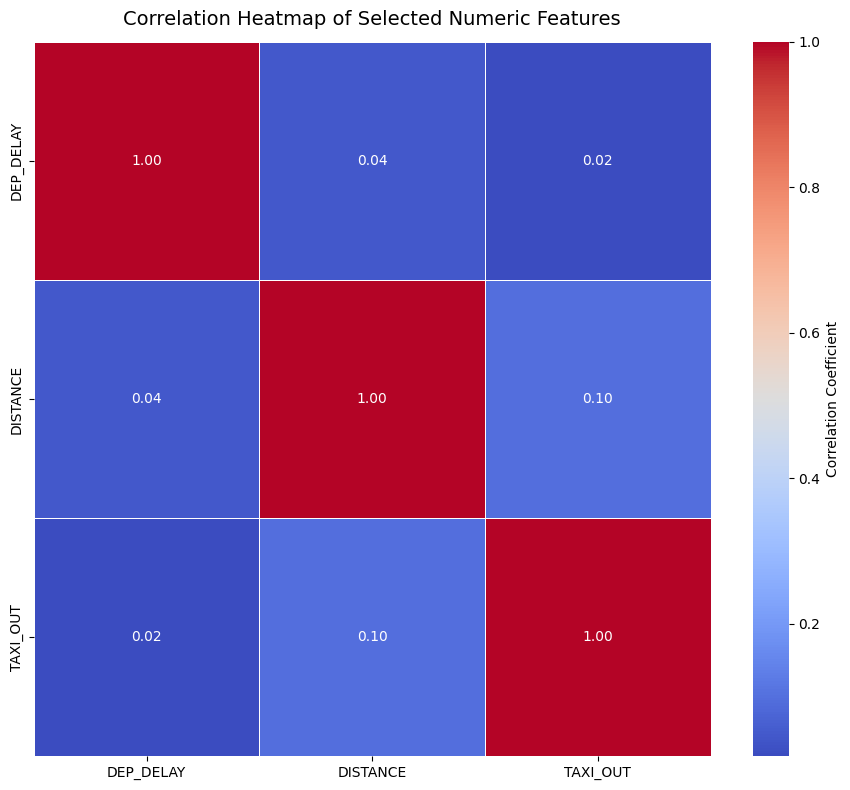

In [3]:
# ==============================================
# Custom correlation heatmap (you choose variables)
# ==============================================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---- 1. Load dataset ----
df = pd.read_csv(r'D:\Project DS Final\T_ONTIME_REPORTING.csv')

# ---- 2. Nhập danh sách các biến bạn muốn vẽ ----
# 👉 Bạn có thể thêm hoặc bớt tùy ý
selected_features = [
    "DEP_DELAY",
    "DISTANCE",
    "TAXI_OUT"
]

# ---- 3. Lọc các biến có tồn tại trong dataset ----
valid_features = [col for col in selected_features if col in df.columns]
if len(valid_features) < 2:
    raise ValueError("⚠️ Cần ít nhất 2 biến hợp lệ để vẽ heatmap!")

# ---- 4. Tính ma trận tương quan ----
corr_matrix = df[valid_features].corr()

# ---- 5. Vẽ heatmap ----
plt.figure(figsize=(9, 8))
sns.heatmap(
    corr_matrix,
    annot=True,             # Hiển thị giá trị số
    cmap="coolwarm",        # Màu xanh-đỏ
    fmt=".2f",              # Làm tròn 2 chữ số
    linewidths=0.5,
    cbar_kws={"label": "Correlation Coefficient"}  # thanh màu bên phải
)

plt.title("Correlation Heatmap of Selected Numeric Features", fontsize=14, pad=12)
plt.tight_layout()
plt.show()
